In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_colwidth', None)
from pathlib import Path
import os.path

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras.models import load_model

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
image_dir = Path('../input/cat-and-dog-images-dataset/Dog and Cat .png')

Creating dataframe of labels and filepath for confusion matrix and classification report

In [3]:
filepaths = list(image_dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

image_df = pd.concat([filepaths, labels], axis=1)

In [4]:
image_df

,Filepath,Label
0,../input/cat-and-dog-images-dataset/Dog and Cat .png/Dog/g29.png,Dog
1,../input/cat-and-dog-images-dataset/Dog and Cat .png/Dog/d271.png,Dog
2,../input/cat-and-dog-images-dataset/Dog and Cat .png/Dog/g34.png,Dog
3,../input/cat-and-dog-images-dataset/Dog and Cat .png/Dog/d240.png,Dog
4,../input/cat-and-dog-images-dataset/Dog and Cat .png/Dog/d261.png,Dog
...,...,...
994,../input/cat-and-dog-images-dataset/Dog and Cat .png/Cat/226.png,Cat
995,../input/cat-and-dog-images-dataset/Dog and Cat .png/Cat/t14.png,Cat
996,../input/cat-and-dog-images-dataset/Dog and Cat .png/Cat/217.png,Cat
997,../input/cat-and-dog-images-dataset/Dog and Cat .png/Cat/306.png,Cat


Image prepocessing

In [5]:
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [6]:
test_images = test_generator.flow_from_dataframe(
    dataframe=image_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=128
)

Found 999 validated image filenames belonging to 2 classes.


Model test of 60 epoch

In [7]:
model = load_model('../input/catdog96/model00000060.h5')

2022-11-09 15:53:43.092397: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


The results of model trained for 60 epochs in this dataset 
 



2022-11-09 15:53:45.862954: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


8/8 [==============================] - 21s 2s/step - loss: 0.2136 - accuracy: 0.9439
    Test Loss: 0.21361
Test Accuracy: 94.39%


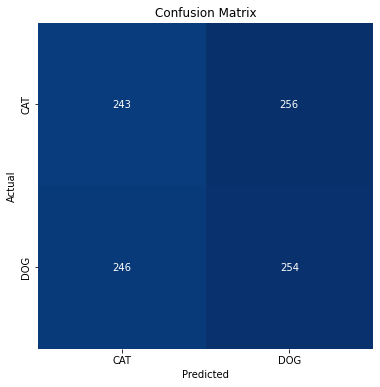

Classification Report:
----------------------
               precision    recall  f1-score   support

         CAT       0.50      0.49      0.49       499
         DOG       0.50      0.51      0.50       500

    accuracy                           0.50       999
   macro avg       0.50      0.50      0.50       999
weighted avg       0.50      0.50      0.50       999



In [8]:
print('The results of model trained for 60 epochs in this dataset \n \n')

results = model.evaluate(test_images, verbose=1)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

predictions = (model.predict(test_images) >= 0.5).astype(np.int64)

cm = confusion_matrix(test_images.labels, predictions, labels=[0, 1])
clr = classification_report(test_images.labels, predictions, labels=[0, 1], target_names=["CAT", "DOG"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.yticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

Model test of 55 epoch

In [9]:
model = load_model('../input/catvsdog55epoch/model00000055.h5')

The results of model trained for 55 epochs in this dataset 
 

8/8 [==============================] - 18s 2s/step - loss: 0.1997 - accuracy: 0.9550
Test Loss: 0.19969
Test Accuracy: 95.50%


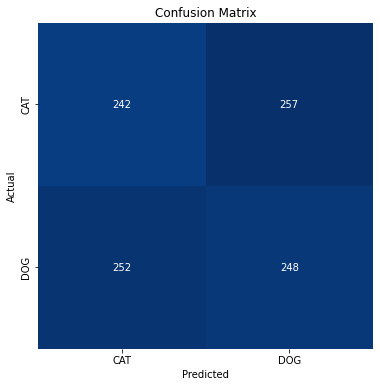

Classification Report:
----------------------
               precision    recall  f1-score   support

         CAT       0.49      0.48      0.49       499
         DOG       0.49      0.50      0.49       500

    accuracy                           0.49       999
   macro avg       0.49      0.49      0.49       999
weighted avg       0.49      0.49      0.49       999



In [10]:
print('The results of model trained for 55 epochs in this dataset \n \n')

results = model.evaluate(test_images, verbose=1)

print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))


predictions = (model.predict(test_images) >= 0.5).astype(np.int64)

cm = confusion_matrix(test_images.labels, predictions, labels=[0, 1])
clr = classification_report(test_images.labels, predictions, labels=[0, 1], target_names=["CAT", "DOG"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.yticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)